# Módulos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

import xgboost as xgb

from imblearn.over_sampling import SMOTE

import joblib

# Lectura de Datos

In [43]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [44]:
df['Bankrupt?'].value_counts()

# Fuerte desbalanceo solo 220 filas son 1
# Y 6599 filas son 0

,count
Bankrupt?,
0,6599
1,220


In [45]:
df.shape

(6819, 96)

# Asignación de variables

In [46]:
x = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Aplicamos SMOTE sobre los datos train test
smote = SMOTE(random_state=42, sampling_strategy=0.5)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [48]:
y_train.value_counts()

,count
Bankrupt?,
0,5286
1,2643


 # Creación Modelo RandomForestCLassifier

In [49]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

# Precisión RFC

In [50]:
rf_pred = rf.predict(x_test)
accuracy_score = accuracy_score(y_test, rf_pred)
print(accuracy_score)

0.9596774193548387


# Calculamos Curva de Roc-Auc RFC

In [51]:
rf_probs = rf.predict_proba(x_test)[:, 1] # Obtén las probabilidades de predicción
fpr, tpr, thresholds = roc_curve(y_test, rf_probs) # Calcula la curva ROC
roc_auc = auc(fpr, tpr)


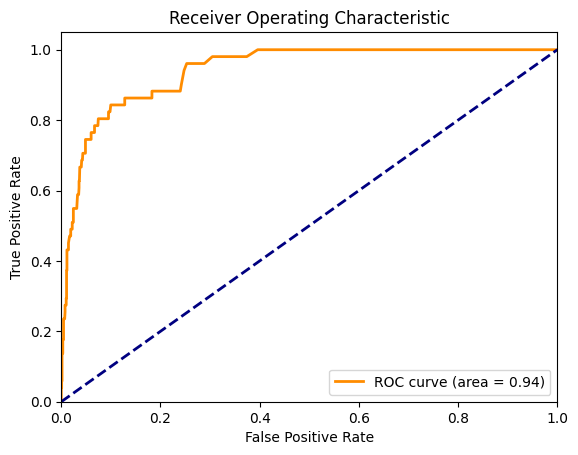

In [52]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
f1 = f1_score(y_test, rf_pred)
print(f1)

0.5045045045045045


In [54]:
# Exhaustividad (Recall)
recall = recall_score(y_test, rf_pred)
print("Exhaustividad:", recall)

Exhaustividad: 0.5490196078431373


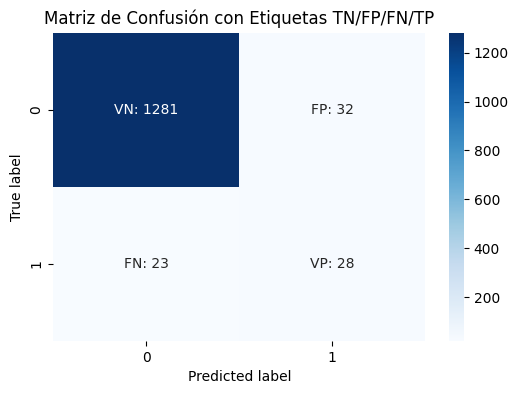

In [55]:
# Matriz de confusión
cm = confusion_matrix(y_test, rf_pred)
#print("Matriz de confusión:\n", confusion)

labels = np.array([
    [f"VN: {cm[0,0]}", f"FP: {cm[0,1]}"],
    [f"FN: {cm[1,0]}", f"VP: {cm[1,1]}"]
])

# 4) Graficar la matriz de confusión con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=labels,  # anotaciones personalizadas
            fmt="",         # sin formato numérico adicional
            cmap="Blues")   # paleta de colores en azul

plt.title("Matriz de Confusión con Etiquetas TN/FP/FN/TP")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [56]:
# Informe de clasificación
report = classification_report(y_test, rf_pred)
print("Informe de clasificación:\n", report)  # \n hace un salto de linea


Informe de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.47      0.55      0.50        51

    accuracy                           0.96      1364
   macro avg       0.72      0.76      0.74      1364
weighted avg       0.96      0.96      0.96      1364



# Modelo XGBoost

In [57]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
# Predecir en el conjunto de prueba
y_pred = xgb_classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score # Reimporto accuracy_score para restaurar la funcion

# Calcular la precisión
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy_xgb)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Precisión: 0.967008797653959
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.56      0.57      0.56        51

    accuracy                           0.97      1364
   macro avg       0.77      0.78      0.77      1364
weighted avg       0.97      0.97      0.97      1364

[[1290   23]
 [  22   29]]


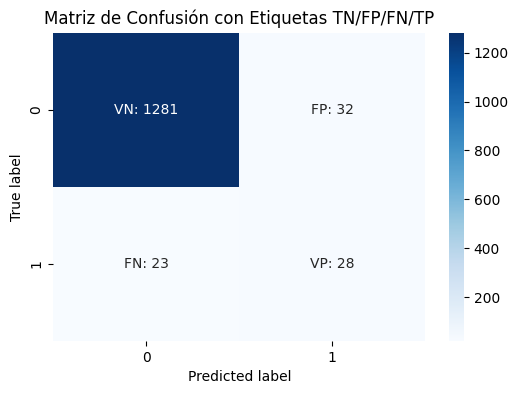

In [60]:
# Matriz de confusión
cm = confusion_matrix(y_test, rf_pred)
#print("Matriz de confusión:\n", confusion)

labels = np.array([
    [f"VN: {cm[0,0]}", f"FP: {cm[0,1]}"],
    [f"FN: {cm[1,0]}", f"VP: {cm[1,1]}"]
])

# 4) Graficar la matriz de confusión con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=labels,  # anotaciones personalizadas
            fmt="",         # sin formato numérico adicional
            cmap="Blues")   # paleta de colores en azul

plt.title("Matriz de Confusión con Etiquetas TN/FP/FN/TP")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [64]:
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(xgb_classifier, "xgb_classifier.pkl")




['xgb_classifier.pkl']